In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mvc.csv", low_memory=False)
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/11/2020,10:30,NaN,NaN,NaN,NaN,NaN,ALEXANDER HAMILTON BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4272183,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,12/31/2019,12:00,QUEENS,11368,40.738950,-73.852720,"(40.73895, -73.85272)",NaN,NaN,59-30 108 STREET,...,Unspecified,NaN,NaN,NaN,4267173,Sedan,Sedan,NaN,NaN,NaN
2,01/12/2020,19:40,NaN,NaN,40.763020,-73.770690,"(40.76302, -73.77069)",BELL BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4272143,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,01/13/2020,11:50,QUEENS,11355,40.754818,-73.828070,"(40.754818, -73.82807)",NaN,NaN,42-28 MAIN STREET,...,Unspecified,NaN,NaN,NaN,4272869,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,12/17/2019,17:20,BRONX,10475,40.886845,-73.825230,"(40.886845, -73.82523)",BOSTON ROAD,HEATHCOTE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4261087,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722529,07/06/2012,18:00,QUEENS,11377,40.746146,-73.898108,"(40.7461455, -73.8981085)",ROOSEVELT AVENUE,67 STREET,NaN,...,Unspecified,NaN,NaN,NaN,238690,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1722530,07/04/2012,16:38,QUEENS,11385,40.700652,-73.896270,"(40.7006522, -73.8962702)",MYRTLE AVENUE,60 LANE,NaN,...,Unspecified,NaN,NaN,NaN,213225,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN
1722531,07/11/2012,16:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2896749,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1722532,07/08/2012,2:45,BROOKLYN,11208,40.667955,-73.870064,"(40.6679546, -73.8700642)",LINDEN BOULEVARD,EUCLID AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,163455,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [3]:
factors=df[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED"]]
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Unspecified")&((factors["CONTRIBUTING FACTOR VEHICLE 2"]!="Unspecified")&(factors["CONTRIBUTING FACTOR VEHICLE 2"].notna()))]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [4]:
factors=factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]!="Unspecified")]
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
1,Following Too Closely,Unspecified,NaN,NaN,NaN,1.0,0.0
2,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
4,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
5,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...
1722525,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN,0.0,0.0
1722526,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,2.0,0.0
1722529,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,0.0,0.0
1722531,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,1.0,0.0


In [5]:
factors=factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"].notna()].reset_index(drop=True)
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Following Too Closely,Unspecified,NaN,NaN,NaN,1.0,0.0
1,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
2,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...
1097485,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN,0.0,0.0
1097486,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,2.0,0.0
1097487,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,0.0,0.0
1097488,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,1.0,0.0


In [6]:
factors.head(100)

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Following Too Closely,Unspecified,NaN,NaN,NaN,1.0,0.0
1,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
2,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...
95,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
96,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
97,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,0.0,0.0
98,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,0.0,0.0


In [7]:
arr=["Unspecified","Other Vehicular","1","80"]
factors=factors.replace(arr,np.NaN)

In [8]:
factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"]=="80"]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [9]:
factors=factors.rename(columns={"CONTRIBUTING FACTOR VEHICLE 1":"F1","CONTRIBUTING FACTOR VEHICLE 2":"F2","CONTRIBUTING FACTOR VEHICLE 3":"F3","CONTRIBUTING FACTOR VEHICLE 4":"F4","CONTRIBUTING FACTOR VEHICLE 5":"F5"})
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Following Too Closely,NaN,NaN,NaN,NaN,1.0,0.0
1,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
2,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...
1097485,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN,0.0,0.0
1097486,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,2.0,0.0
1097487,Fatigued/Drowsy,NaN,NaN,NaN,NaN,0.0,0.0
1097488,Fatigued/Drowsy,NaN,NaN,NaN,NaN,1.0,0.0


In [10]:
factors=factors.loc[(factors["F1"].notna())|(factors["F2"].notna())|(factors["F3"].notna())|(factors["F4"].notna())|(factors["F5"].notna())].reset_index(drop=True)
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Following Too Closely,NaN,NaN,NaN,NaN,1.0,0.0
1,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
2,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...
1060419,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN,0.0,0.0
1060420,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,2.0,0.0
1060421,Fatigued/Drowsy,NaN,NaN,NaN,NaN,0.0,0.0
1060422,Fatigued/Drowsy,NaN,NaN,NaN,NaN,1.0,0.0


In [11]:
f=factors[["F1","F2","F3","F4","F5"]]
f

,F1,F2,F3,F4,F5
0,Following Too Closely,NaN,NaN,NaN,NaN
1,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
2,Backing Unsafely,NaN,NaN,NaN,NaN
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1060419,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN
1060420,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
1060421,Fatigued/Drowsy,NaN,NaN,NaN,NaN
1060422,Fatigued/Drowsy,NaN,NaN,NaN,NaN


In [12]:
f=f.unstack().reset_index(drop=True)
f

0                   Following Too Closely
1          Driver Inattention/Distraction
2                        Backing Unsafely
3          Driver Inattention/Distraction
4           Failure to Yield Right-of-Way
                        ...              
5302115                               NaN
5302116                               NaN
5302117                               NaN
5302118                               NaN
5302119                               NaN
Length: 5302120, dtype: object

In [13]:
f=f.dropna()
f

0                   Following Too Closely
1          Driver Inattention/Distraction
2                        Backing Unsafely
3          Driver Inattention/Distraction
4           Failure to Yield Right-of-Way
                        ...              
5285616                   Fatigued/Drowsy
5291588                   Fatigued/Drowsy
5291680                   Fatigued/Drowsy
5292521    Driver Inattention/Distraction
5297312           Outside Car Distraction
Length: 1258371, dtype: object

In [36]:
f.value_counts()

Driver Inattention/Distraction                           409748
Failure to Yield Right-of-Way                            113882
Following Too Closely                                    105020
Backing Unsafely                                          73227
Fatigued/Drowsy                                           58881
Passing or Lane Usage Improper                            52714
Turning Improperly                                        51373
Passing Too Closely                                       46009
Unsafe Lane Changing                                      39328
Traffic Control Disregarded                               32725
Driver Inexperience                                       31415
Lost Consciousness                                        25077
Pavement Slippery                                         20963
Unsafe Speed                                              19767
Reaction to Uninvolved Vehicle                            18508
Prescription Medication                 

In [23]:
f=f.replace("Illnes","Illness")
f=f.replace("Drugs (Illegal)","Drugs (illegal)")
f=f.replace("Cell Phone (hand-Held)","Cell Phone (hand-held)")
f

0                   Following Too Closely
1          Driver Inattention/Distraction
2                        Backing Unsafely
3          Driver Inattention/Distraction
4           Failure to Yield Right-of-Way
                        ...              
5285616                   Fatigued/Drowsy
5291588                   Fatigued/Drowsy
5291680                   Fatigued/Drowsy
5292521    Driver Inattention/Distraction
5297312           Outside Car Distraction
Length: 1258371, dtype: object

In [25]:
f.value_counts(normalize=True)

Driver Inattention/Distraction                           0.325618
Failure to Yield Right-of-Way                            0.090500
Following Too Closely                                    0.083457
Backing Unsafely                                         0.058192
Fatigued/Drowsy                                          0.046791
Passing or Lane Usage Improper                           0.041891
Turning Improperly                                       0.040825
Passing Too Closely                                      0.036562
Unsafe Lane Changing                                     0.031253
Traffic Control Disregarded                              0.026006
Driver Inexperience                                      0.024965
Lost Consciousness                                       0.019928
Pavement Slippery                                        0.016659
Unsafe Speed                                             0.015708
Reaction to Uninvolved Vehicle                           0.014708
Prescripti

In [36]:
counts=f.value_counts(normalize=True)
tail=counts.loc[counts<=0.01].sum()
counts=counts.loc[counts>0.01]
counts["Other"]=tail

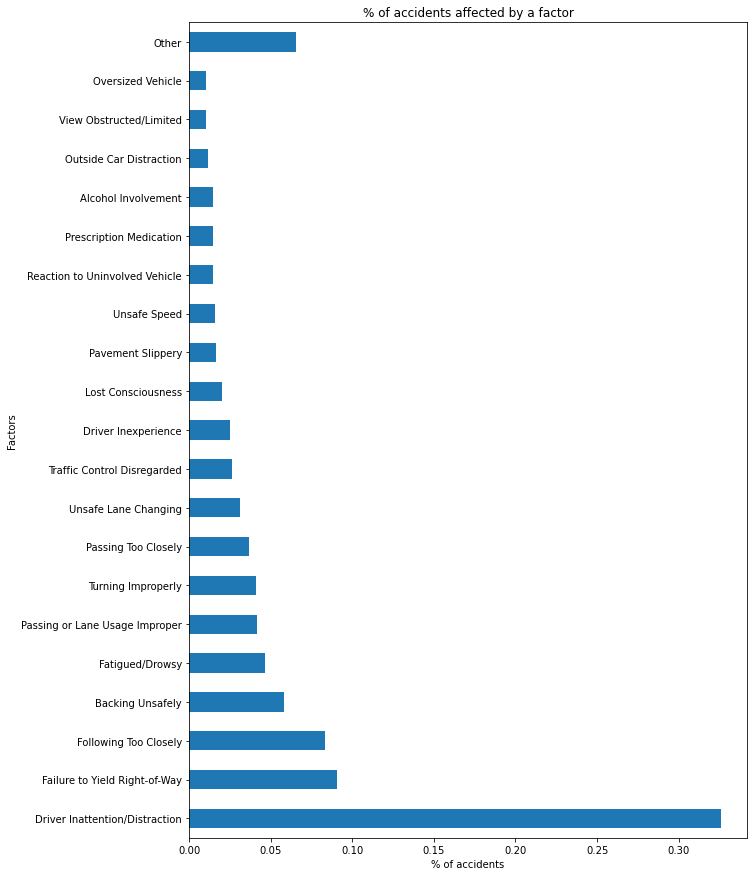

In [46]:
counts.plot.barh(figsize=(10,15))
plt.ylabel("Factors")
plt.xlabel("% of accidents")
plt.title("% of accidents affected by a factor")
plt.show()